In [1]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 
#The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data


17464789/17464789 [==============================] - 31s 2us/step


In [4]:
len(train_data)

25000

In [5]:
len(train_labels)

25000

In [6]:
len(test_data)

25000

In [7]:
len(test_labels)

25000

In [8]:
len(train_data[0])

218

In [9]:
train_data[0] #after lemmitizationn and tokenization the new shape is in numbers or token that shows review

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [11]:
## This process will decode the numbers into proper review 

word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


1641221/1641221 [==============================] - 2s 1us/step


In [12]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [13]:
train_labels[1]

0

In [19]:
# Encoding the integer sequences into a binary matrix, ForExample | train_labels[1] is number we have to convert it into
# categorical by using one-hot-encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [20]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [21]:
x_train[0] #Bags of words >>> the technque that we use here to convert into binary..... we not used onHotEncoding here

array([0., 1., 1., ..., 0., 0., 0.])

In [23]:
len(x_train[0])

10000

In [39]:
#Change the type of lebels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [40]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()


model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
#Compileiation OF model

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [48]:
#Training our model 

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=256,validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 3s 36ms/step - loss: 0.2910 - accuracy: 0.8793 - val_loss: 0.2923 - val_accuracy: 0.8813
Epoch 2/20
59/59 [==============================] - 1s 13ms/step - loss: 0.2055 - accuracy: 0.9239 - val_loss: 0.2812 - val_accuracy: 0.8845
Epoch 3/20
59/59 [==============================] - 1s 13ms/step - loss: 0.1627 - accuracy: 0.9421 - val_loss: 0.2858 - val_accuracy: 0.8839
Epoch 4/20
59/59 [==============================] - 1s 13ms/step - loss: 0.1265 - accuracy: 0.9587 - val_loss: 0.3067 - val_accuracy: 0.8831
Epoch 5/20
59/59 [==============================] - 1s 13ms/step - loss: 0.1046 - accuracy: 0.9662 - val_loss: 0.3269 - val_accuracy: 0.8799
Epoch 6/20
59/59 [==============================] - 1s 13ms/step - loss: 0.0804 - accuracy: 0.9761 - val_loss: 0.3488 - val_accuracy: 0.8775
Epoch 7/20
59/59 [==============================] - 1s 13ms/step - loss: 0.0658 - accuracy: 0.9809 - val_loss: 0.4136 - val_accuracy: 0.8655
Epoch 8/20
59

In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

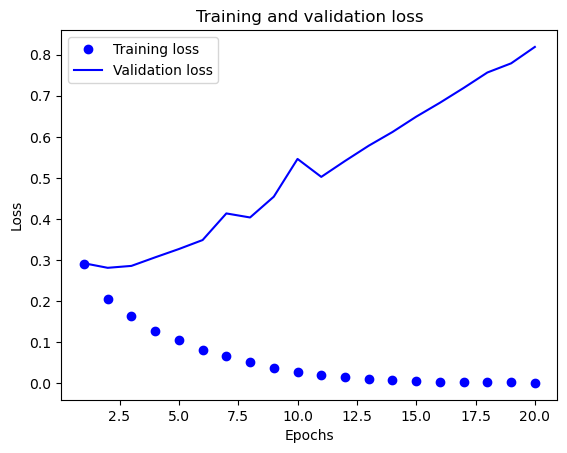

In [50]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']

val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

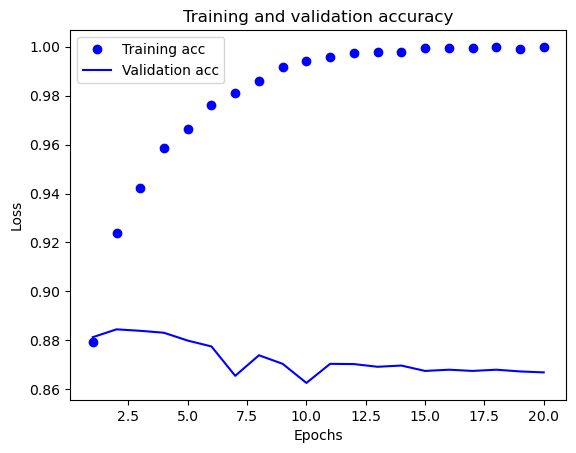

In [58]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.291028,0.879267,0.292292,0.8813
1,0.205517,0.923933,0.281152,0.8845
2,0.162709,0.942067,0.285826,0.8839
3,0.126517,0.958733,0.306653,0.8831
4,0.104617,0.966200,0.326877,0.8799
5,0.080407,0.976067,0.348760,0.8775
6,0.065790,0.980933,0.413554,0.8655
7,0.051706,0.985933,0.403711,0.8739
8,0.037785,0.991667,0.454343,0.8704
9,0.028410,0.994133,0.546207,0.8626
